In [3]:
import numpy as np
import numpy.matlib as mlib
import matplotlib.pyplot as plt
%matplotlib inline

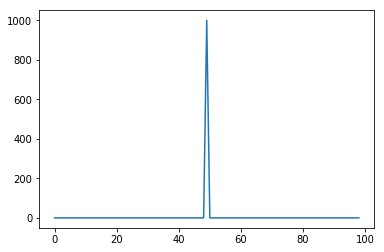

In [8]:
x = np.sort(np.random.rand(1,1000))
y = np.sort(np.random.rand(1,1000))
# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# print(np.shape(x)[1])
# neur1.shape
# diff1 = neur1-mlib.repmat(np.transpose(y),1,len(x))

# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# lenx = np.shape(x)[1]
# leny = np.shape(y)[1]
    
# diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
# diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
# tbin = np.linspace(-5,5,100)
# corr1, bedge = np.histogram(diff1,bins=tbin) 
# # 
# np.shape(corr1)
z = spikegram(x,y)
plt.plot(z)

In [12]:
def spikegram(x,y):
    
    neur1 =  mlib.repmat(x,len(y),1)
    neur2 = mlib.repmat(y,len(x),1)
    
    lenx = np.shape(x)[1]
    leny = np.shape(y)[1]
    
#     diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
#     diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
    
    diff1 = neur1-neur2[:,np.newaxis]
    diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
    
    tbin = np.linspace(-5,5,100) 
    corr1, bedge = np.histogram(diff1,tbin) 
    return corr1

   
    
#    if(a > b):
#       print str(a) + " is greater than " + str(b)
#    elif(b > a):
#       print str(b) + " is greater than " + str(a)

In [11]:
x[:,np.newaxis].shape
# y.shape

(1, 1, 1000)

In [14]:
a = [1,2]
a

[1, 2]

In [15]:
2*a

[1, 2, 1, 2]

In [17]:
2*a

[1, 2, 1, 2]

In [6]:
import numpy as np
from numba import jit
a = np.arange(1, 10 ** 7)
b = np.arange(-10 ** 7, -1)


@jit(nopython=True)
def sum_sequence(a, b):
    result = np.zeros_like(a)
    for i in range(len(a)):
        result[i] = a[i] - b[i]
    return result

In [8]:
import timeit
    
timeit.timeit('sum_sequence(a, b)', globals=globals(), number=1)

0.038495200000056684

In [4]:
10.0+9.99

19.990000000000002

In [3]:
1+9.99

10.99

In [5]:
a = {'a':2,'b':2}

In [10]:
len(a)

2

In [9]:
a

dict_keys(['a', 'b'])